In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [4]:
file_path = 'playlist_2010to2023.csv'

In [5]:
df = pd.read_csv(file_path, encoding="ISO-8859-1")

In [47]:
display(df.head())

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_group,genre_category,duration_min
0,2000,Oops!...I Did It Again,81,Oops!... I Did It Again,Britney Spears,"['dance pop', 'pop']",81,0.751,0.834,1,...,0.3000,0.000018,0.3550,0.894,95.053,211160,4,dance pop,Pop,3.519333
1,2000,All The Small Things,83,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,0.434,0.897,0,...,0.0103,0.000000,0.6120,0.684,148.726,167067,4,alternative metal,Rock,2.784450
2,2000,Breathe,66,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",62,0.529,0.496,7,...,0.1730,0.000000,0.2510,0.278,136.859,250547,4,contemporary country,Country,4.175783
3,2000,It's My Life,81,Crush,Bon Jovi,"['glam metal', 'rock']",79,0.551,0.913,0,...,0.0263,0.000013,0.3470,0.544,119.992,224493,4,glam metal,Rock,3.741550
4,2000,Bye Bye Bye,75,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",70,0.610,0.926,8,...,0.0310,0.001200,0.0821,0.861,172.638,200400,4,boy band,Other,3.340000


In [55]:
print('Columns:', df.shape)
print(df.info())

Columns: (2400, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2400 non-null   int64  
 1   track_name         2400 non-null   object 
 2   track_popularity   2400 non-null   int64  
 3   album              2400 non-null   object 
 4   artist_name        2400 non-null   object 
 5   artist_genres      2400 non-null   object 
 6   artist_popularity  2400 non-null   int64  
 7   danceability       2400 non-null   float64
 8   energy             2400 non-null   float64
 9   key                2400 non-null   int64  
 10  loudness           2400 non-null   float64
 11  mode               2400 non-null   int64  
 12  speechiness        2400 non-null   float64
 13  acousticness       2400 non-null   float64
 14  instrumentalness   2400 non-null   float64
 15  liveness           2400 non-null   float64
 16  vale

In [57]:
print('Column Names:')
print(df.columns.tolist())

Column Names:
['year', 'track_name', 'track_popularity', 'album', 'artist_name', 'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre_group', 'genre_category', 'duration_min']


In [59]:
print('Summary Statistics:')
display(df.describe())

Summary Statistics:


,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_min
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2011.500000,70.277083,75.882500,0.661767,0.688705,5.238333,-5.811735,0.589167,0.097995,0.164838,0.013442,0.174978,0.536023,120.456363,224695.583750,3.975000,3.744926
std,6.923629,12.958245,12.016746,0.140335,0.165345,3.596909,2.086712,0.492088,0.093276,0.210630,0.082364,0.134153,0.228995,27.640203,41652.938998,0.240276,0.694216
min,2000.000000,0.000000,36.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000,1.623217
25%,2005.750000,65.000000,68.000000,0.573750,0.585000,2.000000,-6.846000,0.000000,0.037900,0.018075,0.000000,0.090475,0.359750,98.061500,199050.500000,4.000000,3.317508
50%,2011.500000,72.000000,77.000000,0.673000,0.706000,5.000000,-5.526500,1.000000,0.056800,0.073600,0.000000,0.120500,0.544000,120.000000,220953.500000,4.000000,3.682558
75%,2017.250000,78.000000,85.000000,0.760000,0.814000,8.000000,-4.381750,1.000000,0.115000,0.233000,0.000057,0.225000,0.726000,137.644500,245467.000000,4.000000,4.091117
max,2023.000000,96.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.979000,0.974000,210.857000,613027.000000,5.000000,10.217117


In [61]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()[:10])


Unique values in 'track_name':
['Oops!...I Did It Again' 'All The Small Things' 'Breathe' "It's My Life"
 'Bye Bye Bye' 'Thong Song' 'The Real Slim Shady' 'Rock DJ' 'Say My Name'
 'Yellow']

Unique values in 'album':
['Oops!... I Did It Again' 'Enema Of The State' 'Breathe' 'Crush'
 'No Strings Attached' 'Unleash The Dragon' 'The Marshall Mathers LP'
 "Sing When You're Winning" "The Writing's On The Wall" 'Parachutes']

Unique values in 'artist_name':
['Britney Spears' 'blink-182' 'Faith Hill' 'Bon Jovi' '*NSYNC' 'Sisqo'
 'Eminem' 'Robbie Williams' "Destiny's Child" 'Coldplay']

Unique values in 'artist_genres':
["['dance pop', 'pop']"
 "['alternative metal', 'modern rock', 'pop punk', 'punk', 'rock', 'socal pop punk']"
 "['contemporary country', 'country', 'country dawn', 'country road']"
 "['glam metal', 'rock']" "['boy band', 'dance pop', 'pop']"
 "['contemporary r&b', 'dirty south rap', 'hip pop', 'r&b', 'urban contemporary']"
 "['detroit hip hop', 'hip hop', 'rap']" "['dance rock

In [63]:
print("Missing Values:", df.isnull().sum())
df.dropna(inplace=True)
print('Duplicate Rows Removed:', df.duplicated().sum())
df.drop_duplicates(inplace=True)

Missing Values: year                  0
track_name            0
track_popularity      0
album                 0
artist_name           0
artist_genres         0
artist_popularity     0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
genre_group          17
genre_category       17
duration_min          0
dtype: int64
Duplicate Rows Removed: 0


In [65]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [67]:
df['genre_group'] = df['artist_genres'].str.extract(r"'([^']+)'")

In [69]:
def map_to_main_genre(genre):
    genre = genre.lower()
    if 'hip hop' in genre or 'rap' in genre:
        return 'Hip Hop / Rap'
    elif 'pop' in genre:
        return 'Pop'
    elif 'r&b' in genre or 'neo soul' in genre or 'quiet sotrm' in genre:
        return 'R&B'
    elif 'rock' in genre or 'metal' in genre:
        return 'Rock'
    elif 'edm' in genre or 'electro' in genre or 'dance' in genre:
        return 'Electronic'
    elif 'latin' in genre or 'reggaeton' in genre:
        return 'Latin'
    elif 'country' in genre:
        return 'Country'
    elif 'folk' in genre:
        return 'Folk'
    elif 'jazz' in genre or 'blues' in genre:
        return 'Jazz / Blues'
    else:
        return 'Other'

In [71]:
df['genre_category'] = df['genre_group'].dropna().apply(map_to_main_genre)

In [73]:
print('Track Counts by Simplified Genre:')
print(df['genre_category'].value_counts())

Track Counts by Simplified Genre:
genre_category
Pop              1075
Hip Hop / Rap     462
Other             378
Rock              203
R&B               106
Electronic         85
Country            36
Latin              34
Folk                3
Jazz / Blues        1
Name: count, dtype: int64


In [75]:
df['genre_category'] = df['genre_category'].str.strip().str.title()
genre_track_popularity = df.groupby('genre_category')['track_popularity'].mean().sort_values(ascending=False)

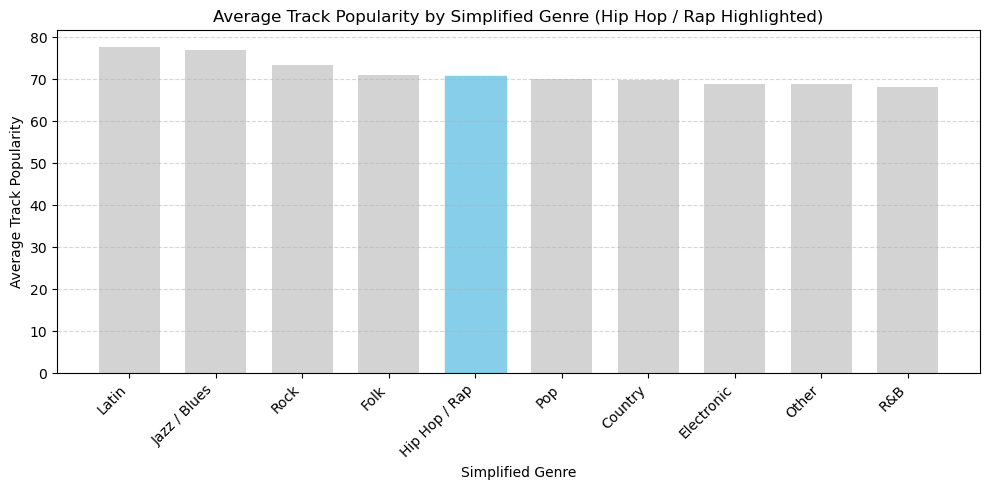

In [77]:
#Artist Popularity
plt.figure(figsize=(10, 5))
bars = plt.bar(genre_track_popularity.index, genre_track_popularity.values, color='lightgray', width=0.7)
bars[list(genre_track_popularity.index).index('Hip Hop / Rap')].set_color('skyblue')
plt.title("Average Track Popularity by Simplified Genre (Hip Hop / Rap Highlighted)", fontsize=12)
plt.ylabel("Average Track Popularity")
plt.xlabel("Simplified Genre")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
# Top 10 Most Popular Hip Hop / Rap Artist and Song
hiphop_df = df[df['genre_category'] == 'Hip Hop / Rap']
top_hiphop_tracks = hiphop_df.sort_values(by='track_popularity', ascending=False).head(10)
top_hiphop_tracks['label'] = top_hiphop_tracks['artist_name'] + " – " + top_hiphop_tracks['track_name']

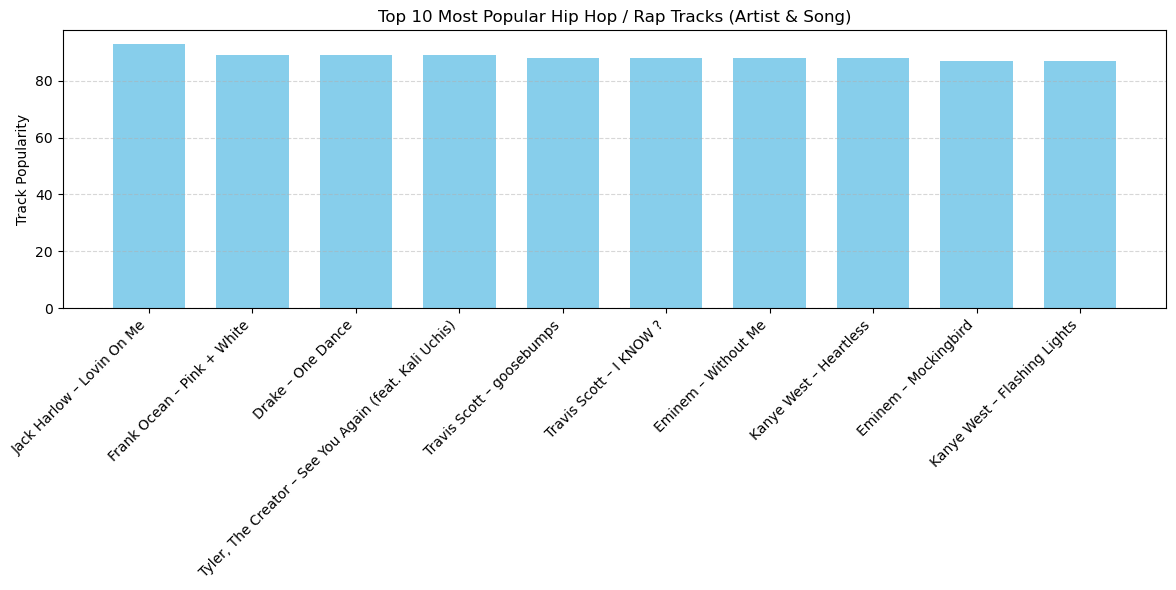

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(top_hiphop_tracks['label'], top_hiphop_tracks['track_popularity'], color='skyblue', width=0.7)
plt.ylabel("Track Popularity")
plt.title("Top 10 Most Popular Hip Hop / Rap Tracks (Artist & Song)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [38]:
df['duration_min'] = df['duration_ms'] / 60000

In [41]:
df.drop(columns=['track_id', 'artist_id', 'playlist_url'], inplace=True)

In [43]:
print("Cleaned Dataset Preview:")
display(df)
%store df

Cleaned Dataset Preview:


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_group,genre_category,duration_min
0,2000,Oops!...I Did It Again,81,Oops!... I Did It Again,Britney Spears,"['dance pop', 'pop']",81,0.751,0.834,1,...,0.3000,0.000018,0.3550,0.894,95.053,211160,4,dance pop,Pop,3.519333
1,2000,All The Small Things,83,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,0.434,0.897,0,...,0.0103,0.000000,0.6120,0.684,148.726,167067,4,alternative metal,Rock,2.784450
2,2000,Breathe,66,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",62,0.529,0.496,7,...,0.1730,0.000000,0.2510,0.278,136.859,250547,4,contemporary country,Country,4.175783
3,2000,It's My Life,81,Crush,Bon Jovi,"['glam metal', 'rock']",79,0.551,0.913,0,...,0.0263,0.000013,0.3470,0.544,119.992,224493,4,glam metal,Rock,3.741550
4,2000,Bye Bye Bye,75,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",70,0.610,0.926,8,...,0.0310,0.001200,0.0821,0.861,172.638,200400,4,boy band,Other,3.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2023,exes,56,exes,Tate McRae,['pop'],85,0.838,0.569,5,...,0.1520,0.000136,0.1020,0.551,136.965,159400,4,pop,Pop,2.656667
2396,2023,QLONA,79,MAÑANA SERÁ BONITO (BICHOTA SEASON),KAROL G,"['reggaeton', 'reggaeton colombiano', 'trap la...",90,0.842,0.756,7,...,0.5250,0.000002,0.0871,0.421,169.925,172798,4,reggaeton,Latin,2.879967
2397,2023,LOVE AGAIN,69,LOVE AGAIN,The Kid LAROI,['australian hip hop'],79,0.662,0.398,11,...,0.7160,0.000000,0.1110,0.468,107.001,145850,4,australian hip hop,Hip Hop / Rap,2.430833
2398,2023,Feather,91,emails i cant send fwd:,Sabrina Carpenter,['pop'],82,0.787,0.686,6,...,0.0893,0.000000,0.0927,0.836,123.510,185553,4,pop,Pop,3.092550


Stored 'df' (DataFrame)
